# Modelado de Intercambio Aleatorio de Activos (RAE) - Segunda parte

En este trabajo se realizan más simulaciones RAE con modelos de intercambio cinético, esta vez con ahorro.

## Modelo CC

### Descripción del modelo

Una extensión del modelo de [Dragulescu & Yakovenko (2000)](https://doi.org/10.1007/s100510070114) estudiada contemporáneamente con su publicación inicial fue la de Chakraborti y Chakrabarti (2000), quienes introducen un parámetro global de "propensión al ahorro" $\lambda$. Llamado [modelo CC](https://doi.org/10.1007/s100510070173), su dinámica se caracteriza por el hecho de que, para $\lambda \in \left[0,1\right)$, cada agente ahorra una fracción $\lambda$ de su dinero, e intercambia una fracción aleatoria $\epsilon$ del resto con el otro comerciante. La regla de intercambio en tal modelo puede describirse así:

$$
m_i \longrightarrow m'_i = \lambda m_{i} + \epsilon \left( 1-\lambda \right)\left( m_i + m_j \right) \\
m_j \longrightarrow m'_j = \lambda m_{j} + \left( 1-\epsilon \right) \left( 1-\lambda \right)\left( m_i + m_j \right)
$$

de donde se deduce que la regla de intercambio es
$$
\Delta m = m_i - m'_i = \left( 1-\lambda \right)\left[ m_i - \epsilon \left( m_i+m_j \right) \right]
$$

En esta regla de intercambio se rompe la simetría de inversión temporal, por lo que la distribución estacionaria puede ser diferente a la distribución B-G.

Aunque no existe una expresión analítica para la distribución en el caso de una constante fija $\lambda$, se ha utilizado una distribución gamma como una buena aproximación de la distribución resultante (para más detalles, lea  [este libro](https://scholar.google.com/scholar_lookup?title=Econophysics%20of%20Income%20and%20Wealth%20Distributions&author=B.K.%20Chakrabarti&publication_year=2013)),

$$
f_{n}\left( m \right) = a_{n}m^{n-1}\exp\left( -\frac{n m}{\left\langle m \right\rangle} \right)\\
$$
$$
\textrm{con}\quad a_{n} = \frac{1}{\Gamma\left( n \right)}\left( \frac{n}{\left\langle m \right\rangle} \right)^{n}
$$

donde $n$ se define como

$$
n\left( \lambda \right) = 1 + \frac{3\lambda}{1-\lambda}
$$

La distribución B-G es el caso especial para $\lambda = 0$, es decir, el caso sin ahorros (colisiones elásticas).

### Simulaciones

A continuación mostramos los resultados de simulaciones según el modelo CC. Los parámetros son: $N = 5 \times 10^{4}$ y $M = 5 \times 10^{6}$. Al principio de las simulaciones, los agentes contaron con la misma cantidad de dinero $\left\langle m \right\rangle = T = \frac{M}{N} = 100$. Se realizó una simulación para cada uno de los siguientes valores de $\lambda$: 0, 5/100, 1/3, 2/3 y 95/100.

In [1]:
from economic_agent import Agent_CC
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from math import gamma

In [2]:
def CC_simulation(nb_agents, total_money, lbda, t_steps):
    """
    Esta función realiza una simulación del modelo CC
    de una economía cerrada de intercambio cinético con 
    "nb_agents" agentes y dinero total "total_money",
    y devuelve un arreglo con los saldos monetarios finales.
    "lbda" es la propensión al ahorro
    y "t_steps" es el número de pasos de tiempo para la simulación  
    """
    T = total_money/nb_agents
    agents_list = [Agent_CC(money=T, lbda=lbda) for i in range(nb_agents)] # Todos los agentes tienen la misma cantidad de dinero
    # Simulación
    for i in range(t_steps):
        agent_i_index = randint(0,N-1)
        agent_j_index = randint(0,N-1) # se elige un par de agentes al azar para hacer transacción
        coin_flip = randint(0,1)
        loser_index = [agent_i_index,agent_j_index][coin_flip] # Uno de los agentes se selecciona al azar como el perdedor
        winner_index = [agent_i_index, agent_j_index][1-coin_flip]
        # El perdedor le paga al ganador
        agents_list[loser_index].pay(payee=agents_list[winner_index])
    
    final_m_array = np.array([agent.money for agent in agents_list])
    
    return final_m_array


def gamma_distribution(m_values, nb_agents, temp, lbda):
    """
    Esta función calcula la distribución gamma de "nb_agents" agentes 
    para un arreglo de m_values valores.
    "temp" es la temperatura de dinero
    y "lbda" es la propensión al ahorro
    """
    n = 1 + (3*lbda)/(1-lbda)
    an = (1/gamma(n))*(n/temp)**n
    P_values = nb_agents*an*(m_values**(n-1))*np.exp(-n*m_values/temp)

    return P_values

In [18]:
# Parámetros
Nexp = 4
N = int(5*10**Nexp) # número de agentes

Mexp = 6
M = 5*10**Mexp # cantidad total de dinero en el sistema

T = M/N # temperatura de dinero

lbda_values = [0, 1/3, 2/3, 95/100]
nb_sims = len(lbda_values)

texp = 6 # Se recomienda 5
t_steps = int(4*10**texp) # Pasos de tiempo para la simulación

# Resultados de la simulación
final_m_arrays = [CC_simulation(nb_agents=N, total_money=M, lbda=lbda, t_steps=t_steps) for lbda in lbda_values]

# Distribuciones Gamma
m_arrays = [range(int(max(final_m_array))+1) for final_m_array in final_m_arrays]
P_arrays = [gamma_distribution(m_values=np.array(m_arrays[_]), nb_agents=N, temp=T, lbda=lbda_values[_]) for _ in range(nb_sims)]

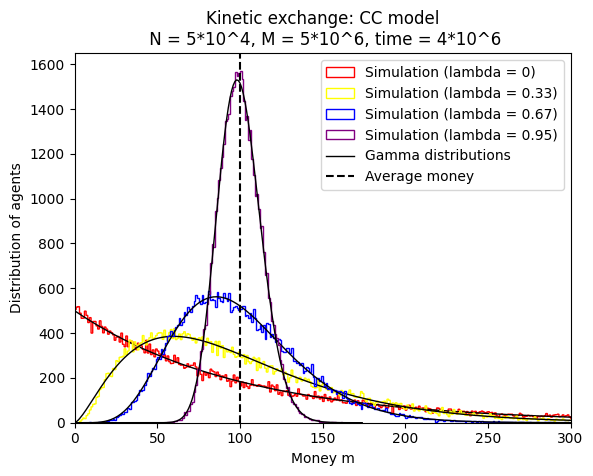

In [19]:
colors = ["red", "yellow", "blue", "purple"]

for i in range(nb_sims):
    plt.hist(final_m_arrays[i], bins=m_arrays[i], label=f"Simulation (lambda = {round(lbda_values[i],2)})", histtype='step', color=colors[i])
    if i == nb_sims-1:
        plt.plot(m_arrays[i], P_arrays[i], color="black", linewidth=1.0, label="Gamma distributions")
    else:
        plt.plot(m_arrays[i], P_arrays[i], color="black", linewidth=1.0)
    
plt.axvline(x=T, color='black', label="Average money", linestyle="--")
plt.title(f"Kinetic exchange: CC model\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.xlabel("Money m")
plt.ylabel("Distribution of agents")
#plt.yscale('log')
plt.xlim(0,300)
plt.legend()
plt.show()

Se puede observar lo siguiente:
1. La distribución gamma se ajusta bien a las distribuciones estacionarias. 
2. La moda de las distribuciones estacionarias se aproxima a $m = \left\langle m \right\rangle$ conforme $\lambda$ se aproxima a 1, e incluso para un valor de $\lambda$ cercano a 1 se obtiene una distribución prácticamente igualitaria.
3. El máximo de las distribuciones disminuye un poco, y luego aumenta, conforme $\lambda$ aumenta.
4. La varianza de las distribuciones estacionarias disminuye conforme $\lambda$ aumenta. Esto es consistente con el hecho de que, al aumentar $\lambda$, disminuye la fracción $\left( 1-\lambda \right)$ del dinero destinada por los agentes para las transacciones, lo que a su vez significa una menor fluctuación aleatoria del dinero de los agentes.

In [ ]:
for _ in range(nb_sims):
    print(f"Varianza para lambda = {round(lbda_values[_],2)}, {round(np.var(final_m_arrays[_]),2)}")

Varianza para lambda = 0, 9997.47
Varianza para lambda = 0.33, 3977.52
Varianza para lambda = 0.67, 1426.95
Varianza para lambda = 0.95, 172.63


Vamos a demostrar los puntos 2 y 4 de forma analítica a partir de la distribución gamma. Para ello, hay qué tener en cuenta que, según la expresión $n\left( \lambda \right) = 1 + \frac{3\lambda}{1-\lambda}$, $n$ es una función de $\lambda$ monotónicamente creciente, con $n \in \left[ 1,\infty \right)$ si $\lambda \in \left[ 0,1 \right)$.

**Punto 2**: al resolver $\frac{d f_{n}\left( m \right)}{dx}=0$ para $m$ encontramos que la moda es igual a $m_{max} = \left( 1-1/n \right)\left\langle m \right\rangle$, por lo que $m_{max}$ aumenta desde 0 a $\left\langle m \right\rangle$ al aumentar $\lambda$.

**Punto 4**: La varianza de la distribución gamma es igual a $\sigma^{2} = \left\langle m^{2} \right\rangle - \left\langle m \right\rangle^{2} = \left[ \int_{0}^{\infty}m^{2} f_{n}\left( m \right)dm \right]-\left\langle m \right\rangle^{2}=\left( 1+\frac{1}{n} \right)\left\langle m \right\rangle^{2} - \left\langle m \right\rangle^{2}=\left\langle m \right\rangle^{2}/n$, por lo que la varianza disminuye cada vez más al aumentar $\lambda$. Veamos cuales son los valores teóricos de la varianza con $\left\langle m \right\rangle =  100$,

In [20]:
def n(lbda):
    return 1 + (3*lbda)/(1-lbda)

def var(m_mean,n):
    return (m_mean**2)/n

m_mean = T
for _ in range(nb_sims):
    print(f"Varianza para lambda = {round(lbda_values[_],2)}, {round(var(m_mean=m_mean, n=n(lbda_values[_])),2)}")

Varianza para lambda = 0, 10000.0
Varianza para lambda = 0.33, 4000.0
Varianza para lambda = 0.67, 1428.57
Varianza para lambda = 0.95, 172.41


Estos valores se acercan a los valores de varianza de los resultados de las simulaciones.

Estos resultados se pueden interpretar desde el punto de *la mano invisible del mercado* en economía. El caso $\lambda = 0$ es uno que está dominado por ruido aleatorio (distribución B-G), al introducir una cantidad finita de ahorro ($\lambda \neq 0$) dictada por el interés propio de nuestros agentes, se provoca que la dinámica de distribución de dinero sea más cooperativa, logrando así el ordenamiento global. De la misma manera, para $\lambda = 0$, $m_{max} = 0$ y la mayoría de los agentes en el mercado termina perdiendo casi todo su dinero, mientras que, incluso por el puro interés propio de cada agente por ahorrar una fracción $\lambda$ de su propio dinero en cualquier transacción, surgen las características globales ya vistas en los puntos anteriores, las cuales redundan en un mayor beneficio para los agentes conforme se aumenta la propensión al ahorro. 

## Modelo CCM

### Descripción del modelo

El [modelo CCM](https://doi.org/10.1238/Physica.Topical.106a00036) es una variante del modelo CC de intercambio aleatorio con ahorro. En este modelo, el parámetro de propensión al ahorro no tiene un solo valor $\lambda$ para toda la población, sino que está distribuído a través de esta de forma heterogénea: cada agente $i$ tiene su propia propensión al ahorro $\lambda_{i} \in \left[ 0,1 \right)$ extraída de la distribución uniforme durante la inicialización. La transacción en este modelo es tal que los agentes intercambian una fracción aleatoria $\epsilon$ de su dinero total restante después del ahorro, 

$$
m_i \longrightarrow m'_i = \lambda_{i} m_{i} + \epsilon \left[ \left( 1-\lambda_{i} \right)m_i + \left( 1-\lambda_{j} \right)m_j \right] \\
m_j \longrightarrow m'_j = \lambda_{j} m_{j} + \left( 1-\epsilon \right) \left[ \left( 1-\lambda_{i} \right)m_i + \left( 1-\lambda_{j} \right)m_j \right]
$$

de donde se deduce que la regla de intercambio es
$$
\Delta m = m_i - m'_i = \left( 1-\lambda_{i} \right)\left( 1-\epsilon \right)m_{i} - \left( 1-\lambda_{j} \right)\epsilon m_{j}
$$

En esta regla de intercambio se rompe la simetría de inversión temporal, por lo que la distribución estacionaria puede ser diferente a la distribución B-G.

### Simulaciones

Los parámetros para una simulación serán $N = 5 \times 10^{4}$ y $M = 5 \times 10^{6}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 100$.

In [1]:
from economic_agent import Agent_CCM
from random import randint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Parámetros
Nexp = 4
N = int(5*10**Nexp) # número de agentes

Mexp = 6
M = 5*10**Mexp # cantidad total de dinero en el sistema

T = M/N # temperatura de dinero

exchange_rule = 'with_savings'

texp = 6 # Se recomienda 5
t_steps = int(4*10**texp) # Pasos de tiempo para la simulación

In [3]:
# Se crean a los agentes
agents_list = [Agent_CCM(money=T) for i in range(N)] # Todos los agentes tienen la misma cantidad de dinero
# Simulación
for i in range(t_steps):
    agent_i_index = randint(0,N-1)
    agent_j_index = randint(0,N-1) # se elige un par de agentes al azar para hacer transacción
    coin_flip = randint(0,1)
    loser_index = [agent_i_index,agent_j_index][coin_flip] # Uno de los agentes se selecciona al azar como el perdedor
    winner_index = [agent_i_index, agent_j_index][1-coin_flip]
    # El perdedor le paga al ganador
    agents_list[loser_index].pay(payee=agents_list[winner_index])

In [ ]:
# Datos
final_m_array = np.array([agent.money for agent in agents_list])
lbda_array = np.array([agent.lbda for agent in agents_list])
nb_bins = int(max(final_m_array))

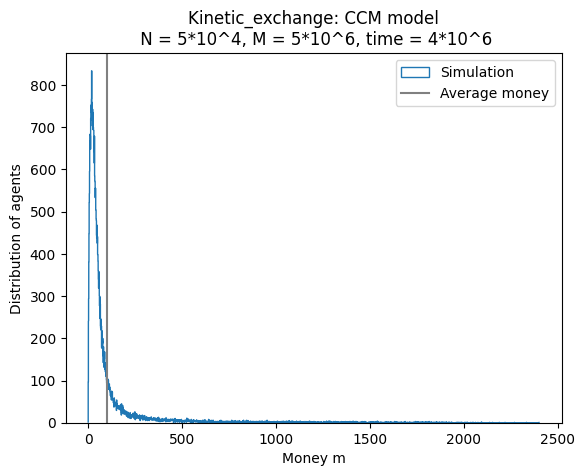

In [23]:
plt.hist(final_m_array, bins=range(nb_bins+2), label="Simulation", histtype='step')
plt.axvline(x=T, color = 'gray', label='Average money')
plt.title(f"Kinetic_exchange: CCM model\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.xlabel("Money m")
plt.ylabel("Distribution of agents")
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()

Vemos que la distribución estacionaria es de tipo Gamma, al igual que en el modelo CC. A continuación, graficamos la distribución acumulada complementaria (CCDF) con cajas logarítmicamente espaciadas,

In [16]:
nb_points = 100
bins = np.logspace(np.log10(min(final_m_array)), np.log10(max(final_m_array)), nb_points)
money_hist = np.histogram(final_m_array, bins=bins, density=True)
x,y = money_hist[1][:-1],money_hist[0]/np.sum(money_hist[0])
y = np.flip(np.flip(y).cumsum()) # Histograma acumulativo complementario

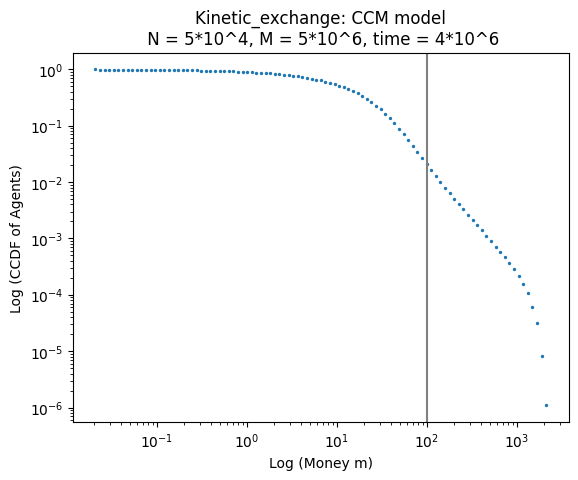

In [17]:
plt.scatter(x,y, s=2.0)
plt.axvline(x=T, color = 'gray', label='Average money')
plt.xlabel("Log (Money m)")
plt.ylabel("Log (CCDF of Agents)")
plt.xscale("log")
plt.yscale("log")
plt.title(f"Kinetic_exchange: CCM model\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.show()

Podemos ver que la distribución estacionaria exhibe además una cola de Pareto con pendiente $\alpha = 1$. Esta ley de potencia aparente se puede observar para cualquier distribución de propensión al ahorro $\lambda$ de la forma $\rho \left( \lambda \right) \simeq \left| \lambda_{0} - \lambda \right|^{\beta}$, o también para distribuciones uniformes dentro de un rango restringido $\lambda_{i} \in \left[ a,b \right] \subset \left[ 0,1 \right)$ (vea [este artículo](https://www.sciencedirect.com/science/article/abs/pii/S0378437103011142?via%3Dihub)).

Ahora veamos cómo es la cantidad de dinero en los agentes en función de su propensión al ahorro,

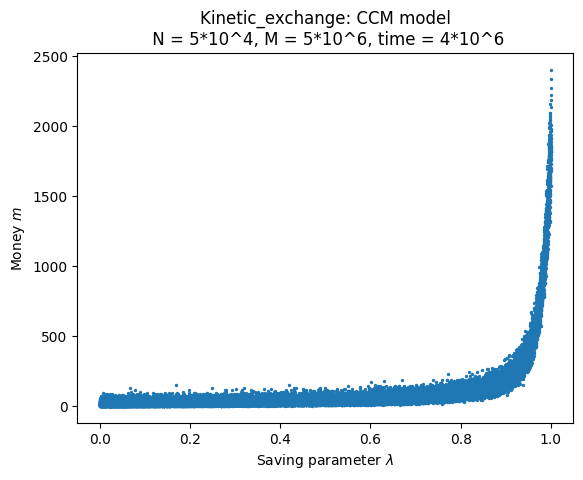

In [21]:
plt.scatter(lbda_array,final_m_array, s=2.0)
plt.xlabel(r"Saving parameter $\lambda$")
plt.ylabel(r"Money $m$")
plt.title(f"Kinetic_exchange: CCM model\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.show()

Aquí podemos ver que la riqueza de los agentes está altamente correlacionada con su valor del parámetro de ahorro, de tal manera que los agentes que ahorran casi todo su dinero  en todas las transacciones invariablemente se convierten en los más ricos. Esto último, discutiblemente, es poco realista. 

Esto sigue siendo así incluso si se introduce un sesgo significativo a favor de los agentes más pobres, porque los agentes ahorrativos en el modelo CCM siempre ganan mucho más de lo que pierden en cada transacción (vea [este artículo](https://www.sciencedirect.com/science/article/abs/pii/S0378437120309237?via%3Dihub)). Este aspecto del modelo también explica la sorprendente aparición de la cola de Pareto, que en realidad es algo ilusoria: la cola derecha de la distribución de equilibrio del modelo CCM está constituida por las colas exponenciales superpuestas de las distribuciones correspondientes a las subpoblaciones con los parámetros de ahorro más altos (vea [este artículo](https://arxiv.org/abs/physics/0504153)).

## Modelo CPT

### Descripción del modelo

Una segunda variación se conoce como el [modelo CPT](https://arxiv.org/abs/math/0412429), que combina el modelo CC con un término adicional de crecimiento estocástico $\eta$,

$$
m_i \longrightarrow m'_i = \lambda m_i + \left( 1 - \lambda \right) m_j + \eta_{i}m_i\\
m_j \longrightarrow m'_j = \lambda m_j + \left( 1 - \lambda \right) m_i + \eta_{j}m_j
$$

donde $\eta_i$ y $\eta_j$ son variables aleatorias independientes e idénticamente distribuídas con media 0 y varianza $\sigma^{2}$ (p. ej. la distribución normal). Describamos los tres términos del lado derecho. El primer término está relacionado con la propensión marginal al ahorro de los agentes, el segundo corresponde a la transacción monetaria y el último contiene los efectos de una economía abierta que describe los rendimientos del mercado. Al igual que en los modelos BDY, CC y CCM, las deudas no están permitidas. Como $\eta_i$ y $\eta_j$ no están correlacionadas, ahora solamente se conserva la riqueza total en su media, ya que

$m'_i + m'_j = \left( 1 + \eta_i \right)m_i + \left( 1 + \eta_j \right)m_j$

El modelo CPT tiene una distribución estacionaria de tipo Gamma-inversa, con parámetro de forma $\alpha = 1 + \frac{2\left( 1 - \lambda \right)}{\sigma^{2}}$ y parámetro de escala $\beta = \alpha - 1$:

$$
p \left( m \right) = \frac{1}{\left\langle m \right\rangle} \frac{\beta^{\alpha}}{\Gamma \left( \alpha \right)}\left(m/\left\langle m \right\rangle\right)^{-1-\alpha}\exp \left( -\frac{\beta}{m/\left\langle m \right\rangle} \right)
$$

En este caso, el parámetro de forma $\alpha$ puede ser interpretado como el índice de Pareto de una cola de ley de potencia, aproximadamente.

### Simulaciones

Los parámetros para una simulación serán $N = 5 \times 10^{4}$, $M = 5 \times 10^{6}$, $\lambda = 99/100$ y $\sigma^{2} = 4/100$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 100$.

In [1]:
from economic_agent import Agent_CPT
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from math import gamma

In [ ]:
# Parámetros
Nexp = 4
N = int(5*10**Nexp) # número de agentes

Mexp = 6
M = 5*10**Mexp # cantidad total de dinero en el sistema

T = M/N # temperatura de dinero

lbda = 99/100 # fracción de ahorro
var = 4/100 # varianza

texp = 6 # Se recomienda 5
t_steps = int(4*10**texp) # Pasos de tiempo para la simulación

In [3]:
# Se crean a los agentes
agents_list = [Agent_CPT(money=T, lbda=lbda, var=var) for i in range(N)] # Todos los agentes tienen la misma cantidad de dinero
# Simulación
for i in range(t_steps):
    agent_i_index = randint(0,N-1)
    agent_j_index = randint(0,N-1) # se elige un par de agentes al azar para hacer transacción
    coin_flip = randint(0,1)
    loser_index = [agent_i_index,agent_j_index][coin_flip] # Uno de los agentes se selecciona al azar como el perdedor
    winner_index = [agent_i_index, agent_j_index][1-coin_flip]
    # El perdedor le paga al ganador
    agents_list[loser_index].pay(payee=agents_list[winner_index])

In [4]:
# Datos para el histograma
final_m_array = np.array([agent.money for agent in agents_list])

El dinero total después de las transacciones es igual a

In [5]:
print(sum(final_m_array))

4816608.541089749


In [13]:
# Dinero promedio después de las transacciones
m_mean = sum(final_m_array)/N

#nb_bins = int(max(final_m_array))
m_max = 800
# Distribución Gamma inversa
m_values = np.array(range(int(min(final_m_array)),m_max))
alpha = 1 + 2*(1-lbda)/var
beta = alpha - 1
P_values = N*(1/m_mean)*((beta**alpha)/gamma(alpha))*((m_values/m_mean)**(-1-alpha))*np.exp(-beta/(m_values/m_mean))

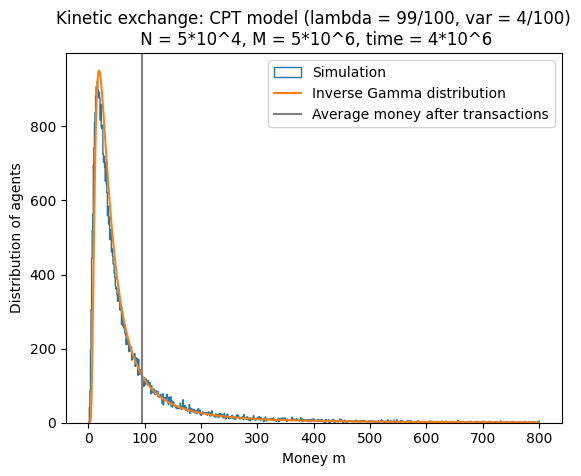

In [14]:
plt.hist(final_m_array, bins=range(m_max+1), label="Simulation", histtype='step')
plt.plot(m_values, P_values, label="Inverse Gamma distribution")
plt.axvline(x=m_mean, color = 'gray', label='Average money after transactions')
plt.title(f"Kinetic exchange: CPT model (lambda = 99/100, var = 4/100)\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.xlabel("Money m")
plt.ylabel("Distribution of agents")
#plt.yscale('log')
plt.legend()
plt.show()

Vemos que la distribución estacionaria sí es de tipo Gamma-inversa, con un valor máximo de riqueza igual a

In [15]:
print(round(max(final_m_array),2))

36199.79


 A continuación, graficamos la distribución acumulada complementaria (CCDF) con cajas logarítmicamente espaciadas,

In [16]:
nb_points = 100
bins = np.logspace(np.log10(min(final_m_array)), np.log10(max(final_m_array)), nb_points)
money_hist = np.histogram(final_m_array, bins=bins, density=True)
x,y = money_hist[1][:-1],money_hist[0]/np.sum(money_hist[0])
y = np.flip(np.flip(y).cumsum()) # Histograma acumulativo complementario

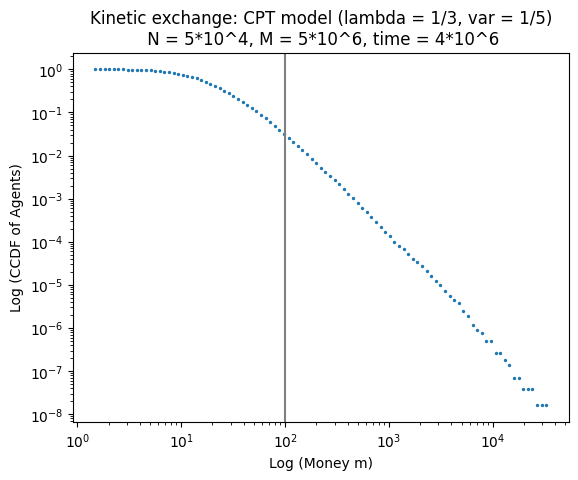

In [17]:
plt.scatter(x,y, s=2.0)
plt.axvline(x=T, color = 'gray', label='Average money')
plt.xlabel("Log (Money m)")
plt.ylabel("Log (CCDF of Agents)")
plt.xscale("log")
plt.yscale("log")
plt.title(f"Kinetic exchange: CPT model (lambda = 1/3, var = 1/5)\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.show()

Podemos ver que la distribución estacionaria exhibe una cola de Pareto con índice $\alpha$ igual a

In [19]:
round(alpha,2)

1.5

El modelo CPT, al igual que el modelo CCM, es un marco de modelado muy flexible y, en consecuencia, se ha estudiado en una variedad de otros contextos. [Düring y Toscani (2008)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1165174) emplean un modelo CPT con propensiones al ahorro atenuadas para estudiar las transacciones internacionales, representando a los países como subpoblaciones con diferentes propensiones al ahorro. [Bisi y Spiga (2010)](https://www.aimsciences.org/article/doi/10.3934/krm.2010.3.223) consideran una variación del modelo CPT en la que la cantidad de riqueza que un agente recibe de su socio comercial también está sujeta a fluctuaciones estocásticas. Más recientemente, [Zhou et al. (2021)](https://onlinelibrary.wiley.com/doi/10.1155/2021/2142876) investigan el efecto de introducir un núcleo de colisión no maxwelliano (es decir, que varía con la riqueza) en el modelo CPT.